# Hands on Principal Component Analysis

In this notebook, we will pick a dataset with 6 independent variables and do principal component analysis on the indepedent variables. Using the PCA results, we will reduce the dimensionality of the dataset. Finally, we will construct simple linear regression models with the original independent variables and contrast it against a model with the new reduced set of variables constructed using PCA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
data = pd.read_csv('auto-mpg.csv')
data.shape

(398, 9)

8 variables:

* MPG (miles per gallon)
* Cylinders (count)
* Engine displacement (cu. inches)
* Horsepower
* Vehicle weight (lbs)
* Acceleration 0-60 (seconds)
* Model year
* Origin (1 American, 2 European, 3 Japanese)

In [3]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data.drop(['car name','origin'], axis=1, inplace=True)
data.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [6]:
hpIsDigit = pd.DataFrame(data.hp.str.isdigit())
data[hpIsDigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


In [7]:
data.replace('?', np.nan, inplace=True)
data[hpIsDigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [8]:
data.median()

mpg       23.0
cyl        4.0
disp     148.5
hp        93.5
wt      2803.5
acc       15.5
yr        76.0
dtype: float64

In [9]:
medianFiller = lambda x: x.fillna(x.median())
data = data.apply(medianFiller, axis=0)

data['hp'] = data['hp'].astype('float64')

## Bivariate Plots

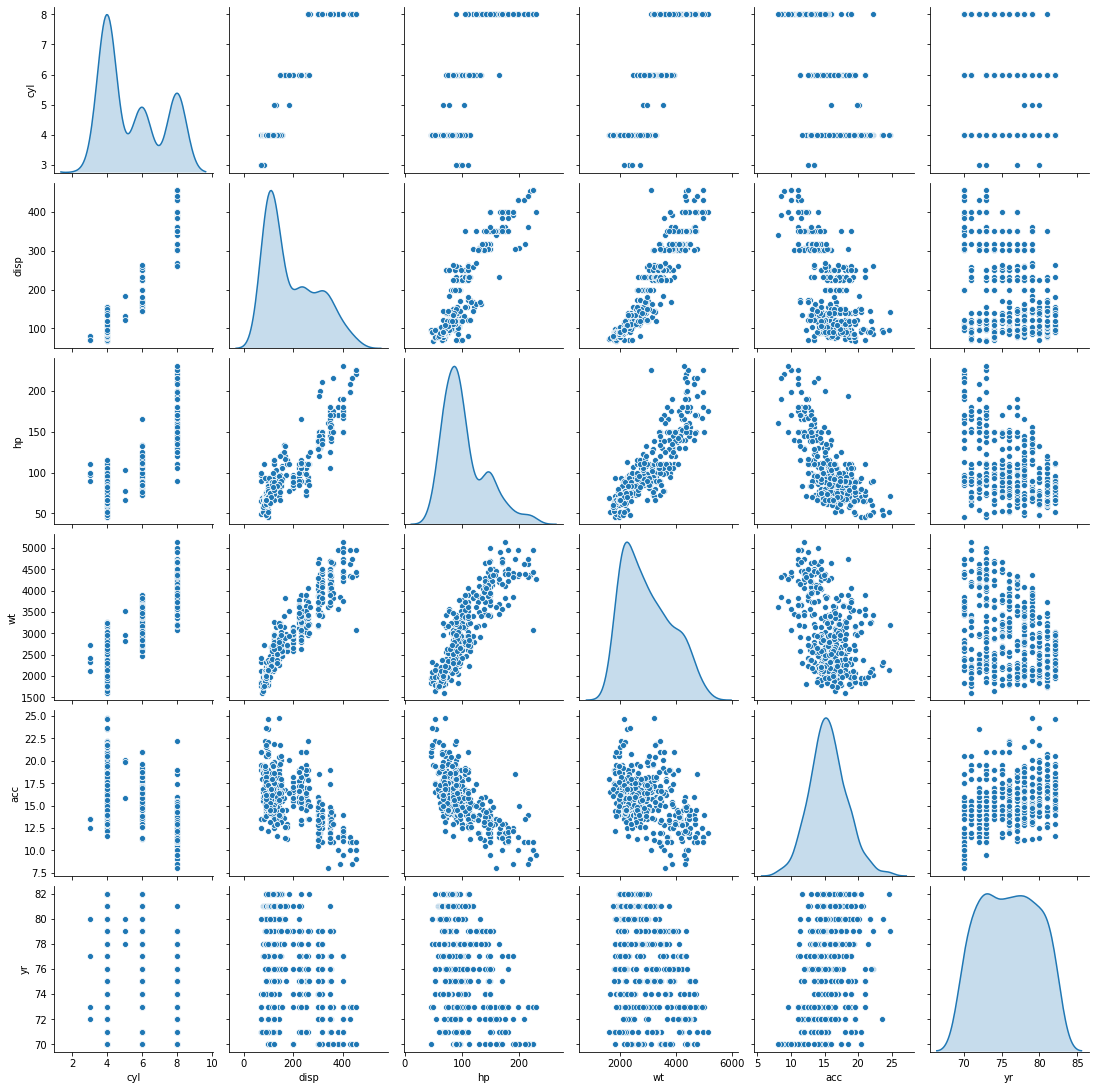

In [11]:
x = data.drop(['mpg'], axis=1)
y = data[['mpg']]

sns.pairplot(x, diag_kind='kde');

In [12]:
from scipy.stats import zscore
xscaled = x.apply(zscore)
xscaled.head()

,cyl,disp,hp,wt,acc,yr
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [13]:
cov = np.cov(xscaled, rowvar=False)
print(cov)

[[ 1.00251889  0.95311615  0.84340357  0.89827376 -0.50669259 -0.34962425]
 [ 0.95311615  1.00251889  0.89803457  0.93517383 -0.54505356 -0.37109656]
 [ 0.84340357  0.89803457  1.00251889  0.86461476 -0.68831918 -0.41477495]
 [ 0.89827376  0.93517383  0.86461476  1.00251889 -0.41850885 -0.30733654]
 [-0.50669259 -0.54505356 -0.68831918 -0.41850885  1.00251889  0.28886274]
 [-0.34962425 -0.37109656 -0.41477495 -0.30733654  0.28886274  1.00251889]]


In [14]:
pca = PCA(n_components=6)
pca.fit(xscaled)

PCA(n_components=6)

In [15]:
print(pca.explained_variance_)

[4.26378678 0.84068225 0.67499578 0.13552589 0.06386533 0.03625731]


In [16]:
print(pca.components_)

[[ 0.45509041  0.46913807  0.46318283  0.44618821 -0.32466834 -0.23188446]
 [ 0.18276349  0.16077095  0.0139189   0.25676595  0.21039209  0.9112425 ]
 [ 0.17104591  0.13443134 -0.12440857  0.27156481  0.86752316 -0.33294164]
 [-0.65709523 -0.18742114  0.62819714  0.33868744  0.15214558  0.02469974]
 [ 0.28804531 -0.00141408  0.60418441 -0.68887559  0.27061128  0.06487726]
 [-0.46420823  0.83717483 -0.10059817 -0.26829299  0.0367486   0.01405118]]


In [17]:
print(pca.explained_variance_ratio_)

[0.70884563 0.13976166 0.11221664 0.0225309  0.01061748 0.0060277 ]


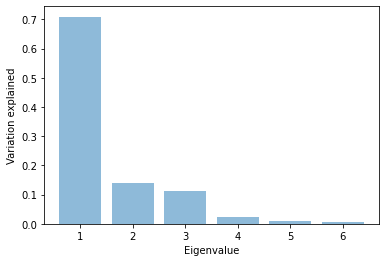

In [21]:
plt.bar(list(range(1,7)), pca.explained_variance_ratio_, alpha=.5, align='center')
plt.xlabel('Eigenvalue')
plt.ylabel('Variation explained')
plt.show()

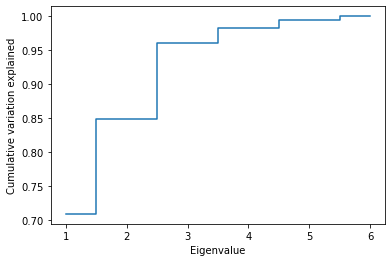

In [22]:
plt.step(list(range(1,7)), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cumulative variation explained')
plt.xlabel('Eigenvalue')
plt.show()

## Dimensionality Reduction

In [23]:
pca3 = PCA(n_components=3)
pca3.fit(xscaled)
x3 = pca3.transform(xscaled)

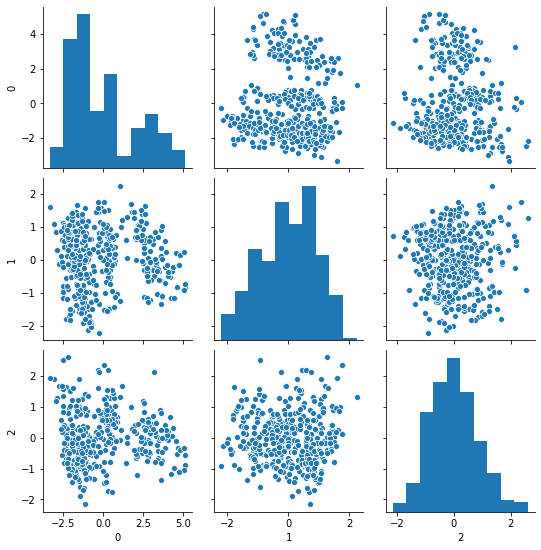

In [24]:
sns.pairplot(pd.DataFrame(x3))

## Construct two linear models

In [25]:
regression1 = LinearRegression()
regression1.fit(xscaled, y)
regression1.score(xscaled, y)

0.8087079552406331

In [28]:
regression2 = LinearRegression()
regression2.fit(x3, y)
regression2.score(x3, y)

0.7799909620572006

What does it look like after train/test/split?

In [29]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(xscaled, y, test_size=.3, random_state=1)

r3 = LinearRegression()
r3.fit(x_train, y_train)
r3.score(x_test, y_test)

0.8268047501149659

In [30]:
x_train, x_test, y_train, y_test = tts(x3, y, test_size=.3, random_state=1)

r4 = LinearRegression()
r4.fit(x_train, y_train)
r4.score(x_test, y_test)

0.806552447541779